In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [6]:
model = model_fn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [9]:
history.history

{'loss': [0.3029700517654419,
  0.2935563027858734,
  0.2844257950782776,
  0.27777937054634094,
  0.26956772804260254],
 'accuracy': [0.8919583559036255,
  0.8950625061988831,
  0.8984583616256714,
  0.9023541808128357,
  0.9046875238418579]}

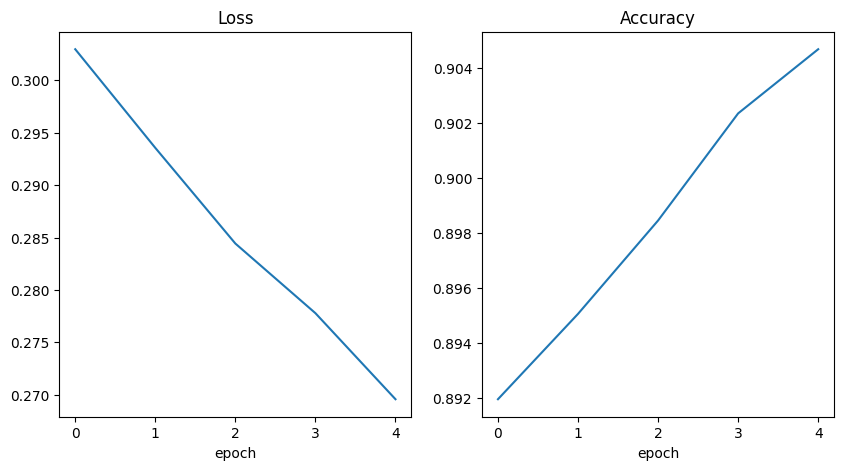

In [20]:
import matplotlib.pyplot as plt

# Assuming 'history' is an object that contains training history data
# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Plot loss on the first subplot
axes[0].plot(history.history['loss'])
axes[0].set_title('Loss')
axes[0].set_xlabel('epoch')

# Plot accuracy on the second subplot
axes[1].plot(history.history['accuracy'])
axes[1].set_title('Accuracy')
axes[1].set_xlabel('epoch')

# Display the plot
plt.show()


In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='Accuracy')
history = model.fit(train_scaled, train_target, epochs=20)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [22]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='Accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
print(history.history.keys())

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])


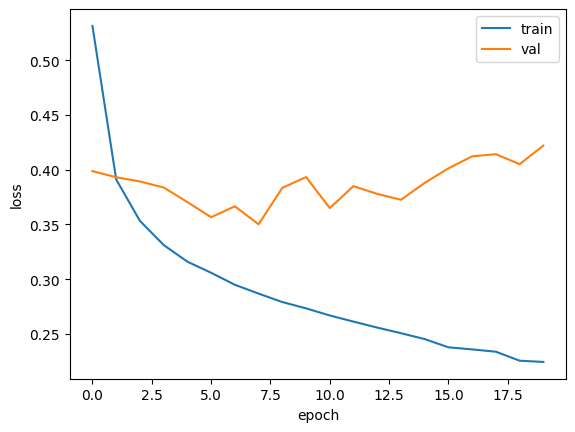

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

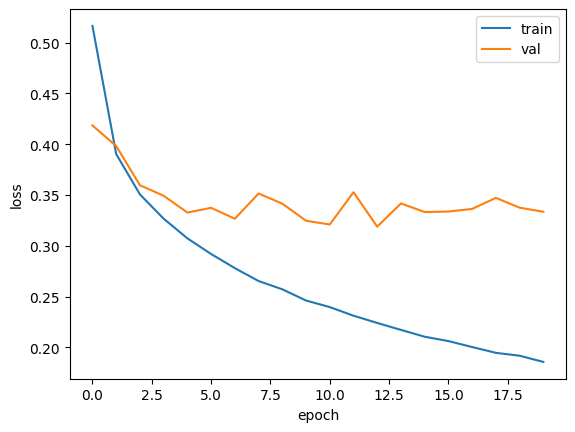

In [24]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='Accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [25]:
model = model_fn(a_layer = keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


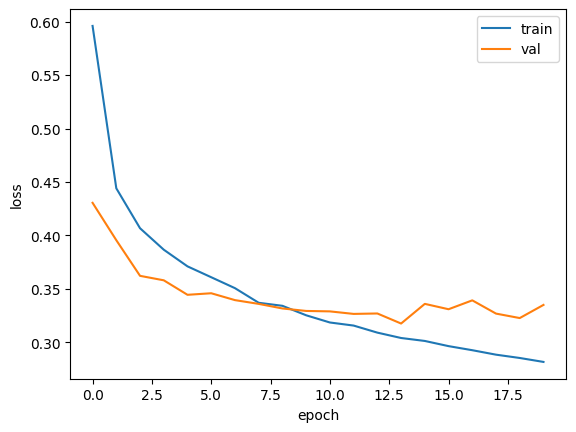

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='Accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [31]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='Accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))
model.save_weights('model-weights.h5')
model.save('model-whole.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
!ls -al | grep model

-rw-r--r-- 1 root root 333320 Nov 16 13:30 model-weights.h5
-rw-r--r-- 1 root root 334672 Nov 16 13:30 model-whole.h5
-rw-r--r-- 1 root root 333320 Nov 16 13:28 model-wieghts.h5


모델의 predict() 메서드 결과에서 가장 큰 값을 고르기 위해 넘파이 argmax()함수를 사용했습니다. 이 함수는 배열에서 가장 큰 값의 인덱스를 반환합니다. 예를 들어 배열의 첫 번째 원소가 가장 큰 값일 경우 0을 반환합니다. 다행히 우리가 준비한 타깃값도 0부터 시작하기 때문에 비교하기 좋습니다.  
argmax()함수의 axis=-1은 배열의 마지막 차원을 따라 최댓값을 고릅니다. 검증 세트는 2차원 배열이기 때문에 마지막 차원은 1이 됩니다. 가단한 예를 그려 보면 쉽게 이해할 수 있습니다. axis=1이면 열을 따라 각 행의 최댓값의 인덱스를 선택하고, axis=0이면 행을 따라 각 열의 초댓값의 인덱스를 선택합니다.  
그다음 라인은 argmax()로 고른 인덱스(val_labels)와 타깃(val_target)을 비교합니다. 두 배열에서 각 위치의 값이 같으면 1이되고 다르면 0이 됩니다. 이를 평균하면 정확도가 됩니다.  
이번에는 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력해 보겠습니다. 모델이 저장된 파일을 읽을 때는 케라스가 제공하는 load_model()함수를 사용합니다.

In [35]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=1)
print(val_labels == val_target)
print(np.mean(val_labels== val_target))

375/375 [==============================] - 1s 3ms/step
[ True  True  True ...  True  True False]
0.8778333333333334


In [44]:
model = keras.models.load_model('model-whole.h5')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3390 - accuracy: 0.8778


[0.33903762698173523, 0.8778333067893982]

In [45]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='Accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='Accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights=True
)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb, early_stopping_cb])

In [55]:
print(early_stopping_cb)
print(early_stopping_cb.stopped_epoch)

18


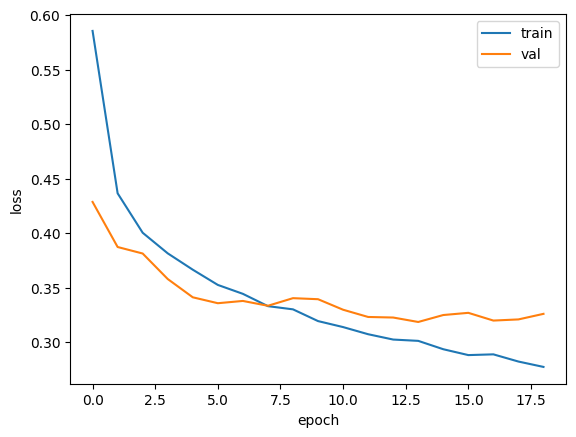

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()